# Lossのグラフ

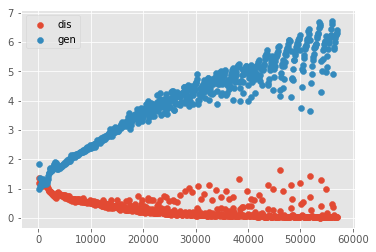

In [3]:
%matplotlib inline

#coding: utf-8
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import json
plt.style.use('ggplot') 

# グラフ
def plot_graph(result_dir = 'result_anime/'):
    f = open(os.path.join(result_dir, 'log'), 'r')
    log = json.load(f)
    iter = [d["iteration"] for d in log]
    epoch = [d["epoch"] for d in log]
    dis = [d["dis/loss"] for d in log]
    gen = [d["gen/loss"] for d in log]
    plt.scatter(iter, dis, label="dis")
    plt.scatter(iter, gen, label="gen")
    plt.legend()
    plt.show()
    
#plot_graph()
plot_graph(result_dir='result_anime_1120_2/')

# 最終出力

result_anime_1124/preview/image00021000.png


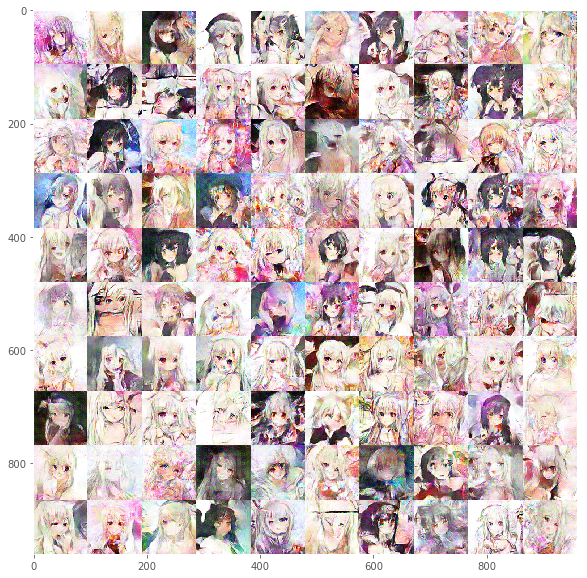

In [6]:
# 最終的な出力画像
import glob
plt.rcParams['figure.figsize'] = (10.0, 10.0) # 表示サイズを拡大

last_file = glob.glob('result_anime_1124/preview/*.png')[-1]
im = Image.open(last_file)
print(last_file)
plt.grid(False)
plt.imshow(np.array(im))

# 出力の探索

In [102]:
%matplotlib inline

import numpy as np
from PIL import Image

import chainer
import chainer.cuda
from chainer import Variable, serializers
from net96 import Generator, Discriminator

gen_npz = 'result_anime/gen_iter_29000'
dis_npz = 'result_anime/dis_iter_21000.npz'
gen = Generator(n_hidden=64)
dis = Discriminator()
serializers.load_npz(gen_npz, gen)
serializers.load_npz(dis_npz, dis)


def out_generated_image(gen, dis, seed=0):
    #np.random.seed(seed)
    z = Variable(np.asarray(gen.make_hidden(1)))
    with chainer.using_config('train', False):
        x = gen(z)
        y = dis(x)
    x = chainer.cuda.to_cpu(x.data)
    y = chainer.cuda.to_cpu(y.data)
    
    #np.random.seed()
    x = np.asarray(np.clip(x * 128.0 + 128.0, 0.0, 255.0), dtype=np.uint8)
    x = x.reshape((3, 96, 96))    
    x = x.transpose(1, 2, 0)
    return x, y, z

for _ in range(100):
    x, y, z = out_generated_image(gen, dis, 0)
    if y < -1:
        plt.imshow(x.astype(np.uint8))
        plt.show()
        print(y)
        #print(z.ｔranspose(3,0,1,2))
        


FileNotFoundError: [Errno 2] No such file or directory: 'result_anime/gen_iter_29000'

# CIFAR-10のテスト

In [ ]:
%matplotlib inline
#coding: utf-8
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

im = Image.open('old/example_image.png')
plt.imshow(np.array(im))

# 画像をランダム表示

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import six

if six.PY3:
    import _pickle as cPickle
else:
    import cPickle


def unpickle(f):
    fo = open(f, 'rb')
    if six.PY3:
        d = cPickle.load(fo, encoding='latin1')
    else:
        d = cPickle.load(fo)
    fo.close()
    return d

# ラベル名をロード
label_names = unpickle("cifar10/batches.meta")["label_names"]
d = unpickle("cifar10/data_batch_1")
data = d["data"]
labels = np.array(d["labels"])
nsamples = len(data)

print(label_names)

# 各クラスの画像をランダムに10枚抽出して描画
nclasses = 10
pos = 1
for i in range(nclasses):
    # クラスiの画像のインデックスリストを取得
    targets = np.where(labels == i)[0]
    np.random.shuffle(targets)
    # 最初の10枚の画像を描画
    for idx in targets[:10]:
        plt.subplot(10, 10, pos)
        img = data[idx]
        # (channel, row, column) => (row, column, channel)
        plt.imshow(img.reshape(3, 32, 32).transpose(1, 2, 0))
        plt.axis('off')
        label = label_names[i]
        pos += 1
plt.show()